In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

**Подгружаем датасет и кратко смотрим, что там:**

In [3]:
df = pd.read_csv('experiment_lesson_4.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.3+ KB


In [5]:
df.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


**Гистограмма распределения времени доставки в контрольной и тестовой группе:**

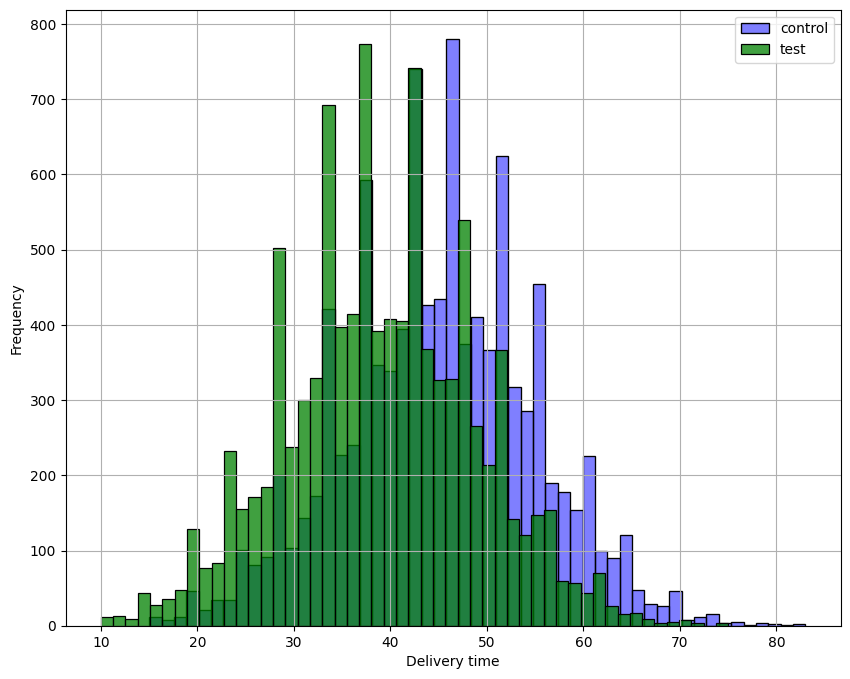

In [6]:
plt.figure(figsize=(10, 8))

sns.histplot(df[df['experiment_group'] == 'control']['delivery_time'], color='blue', label='control', alpha=0.5)
sns.histplot(df[df['experiment_group'] == 'test']['delivery_time'], color='green', label='test')


plt.xlabel('Delivery time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

**Модуль разницы количества наблюдений в тестовой и контрольной группе:**

In [7]:
len(df[df['experiment_group'] == 'test'].value_counts()) - len(df[df['experiment_group'] == 'control'])

12

**Проверка распределений наблюдений в тестовой и контрольной группе на нормальность:**

In [8]:
sp.stats.normaltest(df[df['experiment_group'] == 'control']['delivery_time'], nan_policy='omit')

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [9]:
sp.stats.normaltest(df[df['experiment_group'] == 'test']['delivery_time'], nan_policy='omit')

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

**Расчитаем моменты для тестовой и контрольной группы:**

In [10]:
print(f"Среднее значение времени доставки в тестовой группе: {np.round(np.mean(df[df['experiment_group'] == 'test']['delivery_time']), 2)} минут")
print(f"Стандартное отклонение времени доставки в тестовой группе: {np.round(np.std(df[df['experiment_group'] == 'test']['delivery_time']), 2)} минут \n")

print(f"Среднее значение времени доставки в контрольной группе: {np.round(np.mean(df[df['experiment_group'] == 'control']['delivery_time']), 2)} минут")
print(f"Стандартное отклонение времени доставки в контрольной группе: {np.round(np.std(df[df['experiment_group'] == 'control']['delivery_time']), 2)} минут")

Среднее значение времени доставки в тестовой группе: 39.05 минут
Стандартное отклонение времени доставки в тестовой группе: 9.88 минут 

Среднее значение времени доставки в контрольной группе: 45.07 минут
Стандартное отклонение времени доставки в контрольной группе: 9.99 минут


**Критерий Стьюдента:**

In [11]:
sp.stats.ttest_ind(df[df['experiment_group'] == 'test']['delivery_time'], df[df['experiment_group'] == 'control']['delivery_time'])

TtestResult(statistic=-43.03582663183714, pvalue=0.0, df=20194.0)

**Изменение среднего времени доставки:**

In [12]:
np.round(100*((np.mean(df[df['experiment_group'] == 'test']['delivery_time']) - np.mean(df[df['experiment_group'] == 'control']['delivery_time']))) / np.mean(df[df['experiment_group'] == 'control']['delivery_time']), 2)

-13.35

In [13]:
(np.mean(df[df['experiment_group'] == 'test']['delivery_time']) - np.mean(df[df['experiment_group'] == 'control']['delivery_time']))/np.mean(df[df['experiment_group'] == 'control']['delivery_time']) * 100

-13.354653121660812